# Logistic Regression

In this chapter the logistic regression algorithm is applied to the macro- and microstrucutral data. The procedure is analogous to both kind of data. First, the data is prepared in terms of making it suitable to use it in the code efficiently. Second, the logistic regression model is built, defining the input and output variables, scaling the relevant variables and splitting the data set into training and testing samples and subsequently training the model. Followed by evulating the model, we will refer to different metrics that provide information on how the model performs. 

We first start with **cortical thickness (CT)**.

## 1. Macro-structural data: Cortical Thickness (CT)

### 1.1 Data preperation

In the beginning, all relevant modules needed for the analysis are imported. 

In [1]:
#import relevant modules

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Again, to read the data, the os.pardir() function is used to make the code reproducible independent of different operating systems. 

In [2]:
#read data

CT_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_thickness_Dublin.csv')
CT_Dublin = pd.read_csv(CT_Dublin_path)

In [3]:
CT_Dublin

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON9225,21,2,1,2.180,2.382,2.346,2.526,2.747,2.544,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,CON9229,28,2,1,2.394,1.973,2.534,2.439,2.485,2.435,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,CON9231,29,2,1,2.551,2.567,1.954,2.439,2.428,2.190,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,GASP3037,61,1,2,2.187,1.923,2.160,2.410,2.381,2.277,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,GASP3040,47,1,2,1.862,1.750,2.129,2.516,2.244,2.169,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,RPG9019,31,1,2,2.240,2.150,1.995,2.254,2.164,2.008,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,RPG9102,42,2,2,2.269,2.124,2.531,2.502,2.250,2.183,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,RPG9119,41,1,2,2.273,2.559,2.578,2.463,2.463,2.053,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,RPG9121,51,1,2,1.940,2.438,2.272,2.272,2.610,2.099,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


The data contains variables such as SubjectID, Age and Sex which are not relevant for the classification. Hence, we adjust the dataframe accordingly.

In [4]:
#adjust dataframe

CT_Dublin_adj = CT_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [5]:
CT_Dublin_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,1,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,1,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,1,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,2,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,2,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,2,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,2,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,2,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


As the dataframe shows, the Group variable contains information of whether the samples belong to control or patient. In this case, 1 indicates control and 2 patient. In order to perform a **Logistic Regression**, the labels of the outputs require to be 0 and 1 since the probability of an instance belonging to a default class is computed.

In [6]:
#label group 1 as 0 and 2 as 1

CT_Dublin_adj['Group'] = CT_Dublin_adj['Group'].replace([1,2],[0, 1])

In [7]:
CT_Dublin_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,0,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,0,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,0,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,1,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,1,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,1,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,1,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,1,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


In [8]:
#get shape of df_adj

CT_Dublin_adj.shape

(108, 309)

Because the LogisticRegression function from sklearn requires the inputs to be numpy arrays, in the following step the dataframe is converted to a numpy array.

In [9]:
#dataframe as numpy array 

CT_Dublin_adj.to_numpy()

array([[0.   , 2.18 , 2.382, ..., 2.776, 3.282, 3.347],
       [0.   , 2.394, 1.973, ..., 2.654, 3.124, 3.214],
       [0.   , 2.551, 2.567, ..., 2.495, 2.669, 2.886],
       ...,
       [1.   , 2.273, 2.559, ..., 2.294, 2.571, 2.875],
       [1.   , 1.94 , 2.438, ..., 2.51 , 2.759, 2.838],
       [1.   , 2.108, 2.269, ..., 2.551, 2.855, 2.985]])

### 1.2 Building the model

In the next steps, the **logistic regression** model is built. Firstly, the input and output should be defined. Our input contains the **CT** for all of the 308 brain regions, meaning that there are n=308 features in total. The output is within the Group variable containing label information.

In [10]:
#define input

X = CT_Dublin_adj.iloc[:,1:309].values

In [11]:
X

array([[2.18 , 2.382, 2.346, ..., 2.776, 3.282, 3.347],
       [2.394, 1.973, 2.534, ..., 2.654, 3.124, 3.214],
       [2.551, 2.567, 1.954, ..., 2.495, 2.669, 2.886],
       ...,
       [2.273, 2.559, 2.578, ..., 2.294, 2.571, 2.875],
       [1.94 , 2.438, 2.272, ..., 2.51 , 2.759, 2.838],
       [2.108, 2.269, 2.145, ..., 2.551, 2.855, 2.985]])

In [12]:
X.shape

(108, 308)

In [13]:
#output

y = CT_Dublin_adj.iloc[:,[0]].values

In [14]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [15]:
y.shape

(108, 1)

The numpy.ravel() functions returns contiguous flattened array (1D array with all the input-array elements and with the same type as it). This step is required for the upcoming analyses. 

In [16]:
y = y.ravel()

In [17]:
y.shape

(108,)

Now having defined our input and ouput data, to build the logistic regression model we need to split our data into train and test sets. For this, we use the train_test_split splitter function from Sklearn. The training set is the dataset on which the model is trained. This data is seen and learned by the model. The test set is a a subset of the training set and utilized for an accurate evaluation of a final model fit.
With that function, the data gets divided into X_train, X_test, y_train and y_test. X_train and y_train are used for training and fitting the model. The X_test and y_test sets, however, are used for training the model if the correct labels were predicted. 

But before splitting the data into training and testing set, we use the StandardScaler() function to standardize our data. The function standardizes every feature (each column) indivudally by substracting the mean and then scaling to unit variance (dividing all the values by the standard deviation). As a result, we get a distribution with a mean equal to 0 and with a standard deviation equal to 1. 

Also, with such a small sample, the N=27 participants (108 * 25%) in the testing sample could differ considerably from the training sample by chance. To tackle this problem, we can run the cross validation for 5000 iterations.

In [29]:
n_iter = 5000
y_preds = []
y_tests = []


# scale before splitting into test and train samples
X_sc = StandardScaler().fit_transform(X)

for i in range(n_iter):
    
    # take a new testing and training sample
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.25, random_state = i)
    y_tests.append(y_test)  # store the y_test sample
 
    # fit the logistic regression
    classifier = LogisticRegression(random_state = i, solver ='liblinear')
    classifier.fit(X_train, y_train)
    
    # get the y predictions and store
    y_pred = classifier.predict(X_test)
    y_preds.append(y_pred)

The test size indicates the size of the test subset, a random sampling without replacement about 75% of the rows , the remaining 25% is put into the test set. The random_state parameter allows you to reproduce the same train test split each time when the code is run. With a different value for random_state, different information would flow into the train and test sets. 

The following outputs show the first five lines of the iterations for our predicted y values and y testing values.

In [19]:
y_preds[:5]

[array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1]),
 array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1])]

In [20]:
y_tests[:5]

[array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 0]),
 array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0]),
 array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1])]

In the following, we can concatenate the the y_pred and y_test results from each iteration and use this to compute the confusion matrix. 

In [40]:
y_preds = np.concatenate([y_preds])
y_preds

array([1, 0, 1, ..., 1, 1, 1])

In [41]:
y_tests = np.concatenate([y_tests])
y_tests

array([1, 0, 0, ..., 1, 0, 1])

### 1.3 Model evaluation

In the next section, we will have a look at how the logistic regression model performs and evaluate it. To evaluate the model, a look at different measurements such as the **confusion matrix**, **accuracy, precision and recall** is helpful.

#### 1.3.1 Confusion Matrix

The **confusion matrix** provides information on the quality of the logistic regression model since it shows the predicted values from the model compared to the actual values from the test dataset. We scale this by the sum of the array to get probabilities for **hits, misses, false positives and true negatives**.

In [45]:
cm_CT = confusion_matrix(y_tests, y_preds)

cm_CT_f = cm_CT/np.sum(cm_CT)

print("Confusion Matrix : \n", cm_CT_f)

Confusion Matrix : 
 [[0.43165926 0.31014074]
 [0.00807407 0.25012593]]


To make the confusion matrix visually more appealing and more informative, we run the following code.

Text(0.5, 257.44, 'Predicted label')

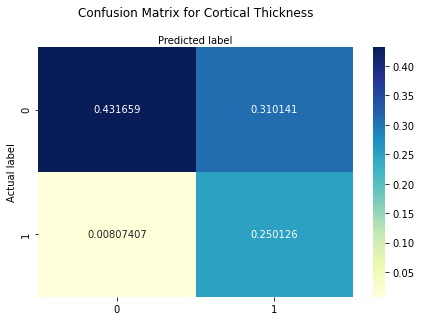

In [46]:
class_names=[0,1]

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cm_CT_f), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix for Cortical Thickness', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

The confusion matrix can be interpreted as follows:

- Bottom righ square: **True positives** or **hits** -> predicted a subject to be patient and he is
- Upper left square: **True negatives** -> predicted a subject to be control and he is
- Upper right square: **False positive (Type 1 Error)** -> predicted a subject as patient but he is control
- Bottom left square: **False negative (Type 2 Error)** or **misses** -> predicted a subject as control but he is patient

The results show that the probability for **hits** is around 25%, for **true negatives** around 43%. The probability for **misses** is around 0.8%. The probability for **false positive** cases is around 31%.
As we can see, the model is better at classifying controls than patients. 
However, based on these values we can compute other measures such as **accuracy, precision, recall and F1-Score** indicating the qualtiy of the model.

#### 1.3.2 Model accuracy, precision, recall F1-Score

The measures indicate the following: 

- **Accuracy**: percentage of correct predictions 
- **Precision**: correct positive predictions relative to total positive predictions. In other words: From all the cases predicted as positive, how many are actually positive. 
- **Recall**: the correct positive predictions relative to total actual positives. In other words: From all the positive cases, how many were predicted correctly. 
- **F1-Score**: combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers.

To compute these measures, we can simply use ```sklearn.metrics module```.

In [48]:
print("Accuracy:",metrics.accuracy_score(y_tests, y_preds)) 

print("Precision:",metrics.precision_score(y_tests, y_preds)) 

print("Recall:",metrics.recall_score(y_tests, y_preds)) 

print("F1-Score:", metrics.f1_score(y_tests, y_preds))

Accuracy: 0.6817851851851852
Precision: 0.446440848273309
Recall: 0.9687293800384428
F1-Score: 0.6112061397554596


So as the values show, our logistic regression model for **cortical thickness** makes 68.18% of the time correct predictions. 44.64% represent the proportion of the model's prediction of psychosis where psychosis is actually present and 96.87% relate to the proportion of all cases of psychosis that the model accurately predicted. 

## 2. Micro-structural data: mean diffusivity (MD) and fractional anisotropy (FA)

In the following section, the logistic regression model is computed for **micro-structural** data in an analogous way as for the macro-structural data. We first start with **MD**.

### 2.1 Mean diffusivity

First, we prepare our data to use it in the code efficiently and adjust it for the logistic regression accordingly.

#### 2.1.1 Data preparation

In [50]:
#read data

MD_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_MD_cortexAv_mean_Dublin.csv')
MD_Dublin = pd.read_csv(MD_Dublin_path)

In [51]:
#adjust dataframe

MD_Dublin_adj = MD_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [52]:
#label group 1 as 0 and 2 as 1

MD_Dublin_adj['Group'] = MD_Dublin_adj['Group'].replace([1,2],[0, 1])

In [53]:
MD_Dublin_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,0,0.911,0.931,0.891,1.048,0.881,0.939,1.124,0.986,1.045,...,0.928,1.067,1.096,0.892,1.238,1.021,1.166,0.900,0.907,0.937
1,0,0.861,0.913,0.846,0.927,0.888,0.894,0.924,1.040,1.093,...,0.878,0.985,1.045,1.001,1.196,1.083,1.143,0.917,0.923,0.960
2,0,0.817,0.827,0.828,0.828,0.780,0.843,0.825,0.848,0.838,...,0.847,0.849,0.819,0.952,0.933,0.942,1.059,0.794,0.834,0.860
3,0,0.887,0.905,0.878,0.932,0.820,0.888,0.970,0.918,0.900,...,0.957,0.985,0.989,1.075,1.150,1.017,0.986,0.888,0.916,0.928
4,0,0.887,0.854,0.905,1.011,0.946,0.922,1.034,1.126,1.114,...,0.871,0.952,0.987,1.325,0.996,1.094,1.064,0.966,0.989,0.977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1,0.843,0.855,0.940,1.017,0.954,0.840,1.128,1.012,0.997,...,0.938,1.062,1.143,0.903,1.364,1.284,1.218,1.017,0.972,1.028
111,1,0.911,0.914,0.926,1.001,0.918,1.115,1.036,1.026,1.001,...,0.957,1.085,1.098,1.059,1.268,1.089,1.173,0.990,1.065,1.021
112,1,0.890,0.899,0.886,0.930,0.883,0.882,0.883,1.190,1.101,...,0.916,1.010,0.974,0.968,1.305,1.168,1.265,0.981,0.975,0.972
113,1,0.920,0.986,0.883,0.879,0.794,0.983,1.029,1.076,1.053,...,0.942,0.985,0.990,1.199,1.353,1.187,1.444,0.947,1.047,1.085


Very important is, not to forget to convert the dataframe into an numpy array!

In [54]:
#dataframe as numpy array 

MD_Dublin_adj.to_numpy()

array([[0.   , 0.911, 0.931, ..., 0.9  , 0.907, 0.937],
       [0.   , 0.861, 0.913, ..., 0.917, 0.923, 0.96 ],
       [0.   , 0.817, 0.827, ..., 0.794, 0.834, 0.86 ],
       ...,
       [1.   , 0.89 , 0.899, ..., 0.981, 0.975, 0.972],
       [1.   , 0.92 , 0.986, ..., 0.947, 1.047, 1.085],
       [1.   , 0.97 , 0.868, ..., 1.125, 1.11 , 1.139]])

#### 2.1.2 Build the model

In the next step, the input and output for our model is defined. For that, we use the **MD** for each 308 cortical region as input and the label whether a participant belongs to the control or patient group as output.

In [55]:
#define input

X_MD = MD_Dublin_adj.iloc[:,1:309].values

In [56]:
#output

y_MD = MD_Dublin_adj.iloc[:,[0]].values

In [57]:
y_MD.shape

(115, 1)

To return a 1D flattened array since its required for further analyses, the .ravel() function is used!

In [58]:
y_MD = y_MD.ravel()

In [59]:
y_MD.shape

(115,)

In [60]:
X_MD

array([[0.911, 0.931, 0.891, ..., 0.9  , 0.907, 0.937],
       [0.861, 0.913, 0.846, ..., 0.917, 0.923, 0.96 ],
       [0.817, 0.827, 0.828, ..., 0.794, 0.834, 0.86 ],
       ...,
       [0.89 , 0.899, 0.886, ..., 0.981, 0.975, 0.972],
       [0.92 , 0.986, 0.883, ..., 0.947, 1.047, 1.085],
       [0.97 , 0.868, 0.94 , ..., 1.125, 1.11 , 1.139]])

Again, we build our model with 5000 iterations.

In [61]:
n_iter_MD = 5000
y_preds_MD = []
y_tests_MD = []

# scale before splitting into test and train samples
X_sc_MD = StandardScaler().fit_transform(X_MD)

for i in range(n_iter):
    # take a new testing and training sample
    X_train_MD, X_test_MD, y_train_MD, y_test_MD = train_test_split(X_sc_MD, y_MD, test_size = 0.25, random_state = i)
    y_tests_MD.append(y_test_MD)  # store the y_test sample
    
    # fit the logistic regression
    classifier_MD = LogisticRegression(random_state = i, solver ='liblinear')
    classifier_MD.fit(X_train_MD, y_train_MD)
    
    # get the y predictions and store
    y_pred_MD = classifier_MD.predict(X_test_MD)
    y_preds_MD.append(y_pred_MD)

In the following steps, we again concatenate the values to compute the confusion matrix.

In [72]:
y_preds_MD = np.concatenate([y_preds_MD])
y_preds_MD

array([1, 0, 0, ..., 1, 0, 1])

In [93]:
y_tests_MD = np.concatenate([y_tests_MD])
y_tests_MD

array([0, 0, 0, ..., 0, 0, 1])

#### 2.1.3 Model evaluation

Next, we will again have a look at the confusion matrix and then compute the evaluation measures as for the **CT**. To get probabilities in the confusion matrix, we again scale the confusion matrix by the sum of the array.

##### 2.1.3.1 Confusion matrix

In [94]:
#confusion matrix

cm_MD = confusion_matrix(y_tests_MD, y_preds_MD)

cm_MD_f = cm_MD/np.sum(cm_MD)
  
print ("Confusion Matrix : \n", cm_MD_f)

Confusion Matrix : 
 [[0.53733103 0.17482759]
 [0.07247586 0.21536552]]


To plot the confusion matrix visually more appealing again, the following code can be run.

Text(0.5, 257.44, 'Predicted label')

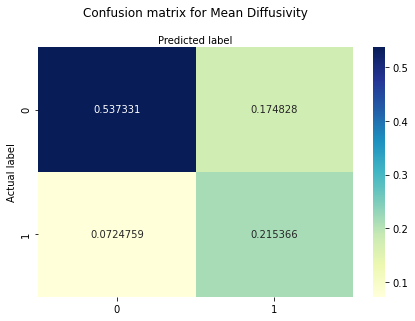

In [95]:
class_names=[0,1]

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cm_MD_f), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Mean Diffusivity', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

The confusion matrix reveals that the probability for **hits** is around 22%, for **true negatives** around 54%. The probability for **misses** is around 7% and for **false positive** cases around 17%. 

##### 2.1.3.2  Model accuracy, precision, recall and F1-Score

In [96]:
#compute accuracy, precision, recall

print("Accuracy:",metrics.accuracy_score(y_tests_MD, y_preds_MD)) 

print("Precision:",metrics.precision_score(y_tests_MD, y_preds_MD)) 

print("Recall:",metrics.recall_score(y_tests_MD, y_preds_MD)) 

print("F1-Score:", metrics.f1_score(y_tests_MD, y_preds_MD))

Accuracy: 0.752696551724138
Precision: 0.5519459860723249
Recall: 0.7482090231688909
F1-Score: 0.6352642018003356


As the values reveal, our logistic regression model for **mean diffusivity** makes 75.26% of the time correct predictions. 55.20% represent the proportion of the model's prediction of psychosis where psychosis is actually present and 74.82% relate to the proportion of all cases of psychosis that the model accurately predicted. 

### 2.2 Fractional anisotropy

Now, the same procedure is applied for **FA**. 

#### 2.2.1 Data preparation

First, the data is adjusted accordingly. 

In [97]:
#read data

FA_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_FA_cortexAv_mean_Dublin.csv')
FA_Dublin = pd.read_csv(FA_Dublin_path)

In [98]:
#adjust dataframe

FA_Dublin_adj = FA_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [99]:
#label group 1 as 0 and 2 as 1

FA_Dublin_adj['Group'] = FA_Dublin_adj['Group'].replace([1,2],[0, 1])

In [100]:
#dataframe as numpy array 

FA_Dublin_adj.to_numpy()

array([[0.   , 0.322, 0.147, ..., 0.157, 0.147, 0.137],
       [0.   , 0.302, 0.155, ..., 0.152, 0.148, 0.152],
       [0.   , 0.324, 0.18 , ..., 0.171, 0.174, 0.143],
       ...,
       [1.   , 0.323, 0.173, ..., 0.181, 0.143, 0.151],
       [1.   , 0.311, 0.174, ..., 0.162, 0.145, 0.123],
       [1.   , 0.294, 0.164, ..., 0.145, 0.147, 0.127]])

#### 2.2.2 Build the model

Again, the input and output variables are defined. Here, we take the **FA** values for every brain region as input.

In [101]:
#define input

X_FA = FA_Dublin_adj.iloc[:,1:309].values

In [102]:
#output

y_FA = FA_Dublin_adj.iloc[:,[0]].values

In [103]:
y_FA = y_FA.ravel()

And finally run the model.

In [104]:
n_iter_FA = 5000
y_preds_FA = []
y_tests_FA = []

# scale before splitting into test and train samples
X_sc_FA = StandardScaler().fit_transform(X_FA)

for i in range(n_iter):
    # take a new testing and training sample
    X_train_FA, X_test_FA, y_train_FA, y_test_FA = train_test_split(X_sc_FA, y_FA, test_size = 0.25, random_state = i)
    y_tests_FA.append(y_test_FA)  # store the y_test sample
    
    # fit the logistic regression
    classifier_FA = LogisticRegression(random_state = i, solver ='liblinear')
    classifier_FA.fit(X_train_FA, y_train_FA)
    
    # get the y predictions and store
    y_pred_FA = classifier_FA.predict(X_test_FA)
    y_preds_FA.append(y_pred_FA)

Concatenate the values from each iteration to compute our confusion matrix!

In [112]:
y_preds_FA = np.concatenate([y_preds_FA])
y_preds_FA

array([1, 0, 0, ..., 1, 0, 1])

In [114]:
y_tests_FA = np.concatenate([y_tests_FA])
y_tests_FA

array([0, 0, 0, ..., 0, 0, 1])

#### 2.2.3 Model evaluation

Again, to get the probabilites we scale the confusion matrix with sum of its array. 

##### 2.2.3.1 Confusion matrix

In [117]:
#confusion matrix

cm_FA = confusion_matrix(y_tests_FA, y_preds_FA)

cm_FA_f = cm_FA / np.sum(cm_FA)
  
    
print ("Confusion Matrix : \n", cm_FA_f)

Confusion Matrix : 
 [[0.44015862 0.272     ]
 [0.05826897 0.22957241]]


To have a nicer plot, again we run the following code!

Text(0.5, 257.44, 'Predicted label')

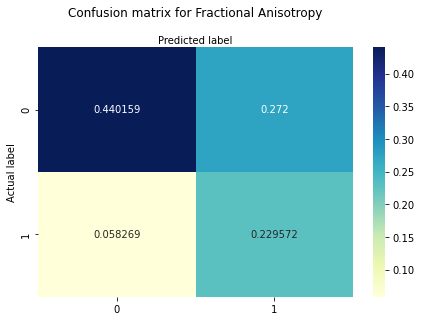

In [118]:
class_names=[0,1]

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cm_FA_f), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Fractional Anisotropy', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

The confusion matrix shows that the probability for **hits** is around 23%, for **true negatives** around 44%. The probability for **misses** is around 6%. The probability for **false positive** cases is around 27%. 

##### 2.2.3.2 Model accuracy, precision, recall and F1-Score

In [120]:
#compute accuracy, precision, recall

print("Accuracy:",metrics.accuracy_score(y_tests_FA, y_preds_FA)) 

print("Precision:",metrics.precision_score(y_tests_FA, y_preds_FA)) 

print("Recall:",metrics.recall_score(y_tests_FA, y_preds_FA)) 

print("F1-Score:", metrics.f1_score(y_tests_FA, y_preds_FA))

Accuracy: 0.6697310344827586
Precision: 0.45770542294577055
Recall: 0.7975657090830678
F1-Score: 0.5816275717468222


As the values reveal, our logistic regression model for **fractional anisotropy** makes 66.97% of the time correct predictions. 45.77% represent the proportion of the model's prediction of psychosis where psychosis is actually present and 79.75% relate to the proportion of all cases of psychosis that the model accurately predicted. 

## 3. Summary

To summarize the performance measures of our logistic regression models for **CT** and **FA and MD**, we can simply create a table with the relevant data.

For that, we need to import the tabulate function from the tabulate module. However, before this u have to run the  ```pip install tabulate```command. Remove the hashtag in the next line, to install it.

In [165]:
#!pip install tabulate

from tabulate import tabulate

Next, we define our data and the column names and print the table.

In [184]:
#create data
data_LR = [["Accuracy", metrics.accuracy_score(y_tests, y_preds), metrics.accuracy_score(y_tests_MD, y_preds_MD), metrics.accuracy_score(y_tests_FA, y_preds_FA)], 
        ["Precision", metrics.precision_score(y_tests, y_preds), metrics.precision_score(y_tests_MD, y_preds_MD),metrics.precision_score(y_tests_FA, y_preds_FA)], 
        ["Recall", metrics.recall_score(y_tests, y_preds), metrics.recall_score(y_tests_MD, y_preds_MD),metrics.recall_score(y_tests_FA, y_preds_FA)], 
        ["F1-Score", metrics.f1_score(y_tests, y_preds), metrics.f1_score(y_tests_MD, y_preds_MD), metrics.f1_score(y_tests_FA, y_preds_FA)]]
  
#define header names
col_names = ["Measure", "Cortical Thickness", "Mean Diffusivity", "Fractional Anisotropy"]
  
#display table
print(tabulate(data_LR, headers=col_names))

Measure      Cortical Thickness    Mean Diffusivity    Fractional Anisotropy
---------  --------------------  ------------------  -----------------------
Accuracy               0.681785            0.752697                 0.669731
Precision              0.446441            0.551946                 0.457705
Recall                 0.968729            0.748209                 0.797566
F1-Score               0.611206            0.635264                 0.581628


What can be seen is, that **CT** has the highest **accuracy** score, **MD** has the highest **precision** score, **CT** the highest **recall** and **MD** the highest **F1-Score**. **Precision and Recall** values are inversely related. As one increases, the other decreases. So when we relate to the **F1-Score**, **MD** performs better.


In the next pages, a different algorithm is applied to the same data.